Running Q-Learning with α=0.1, γ=0.8, ε=0.1


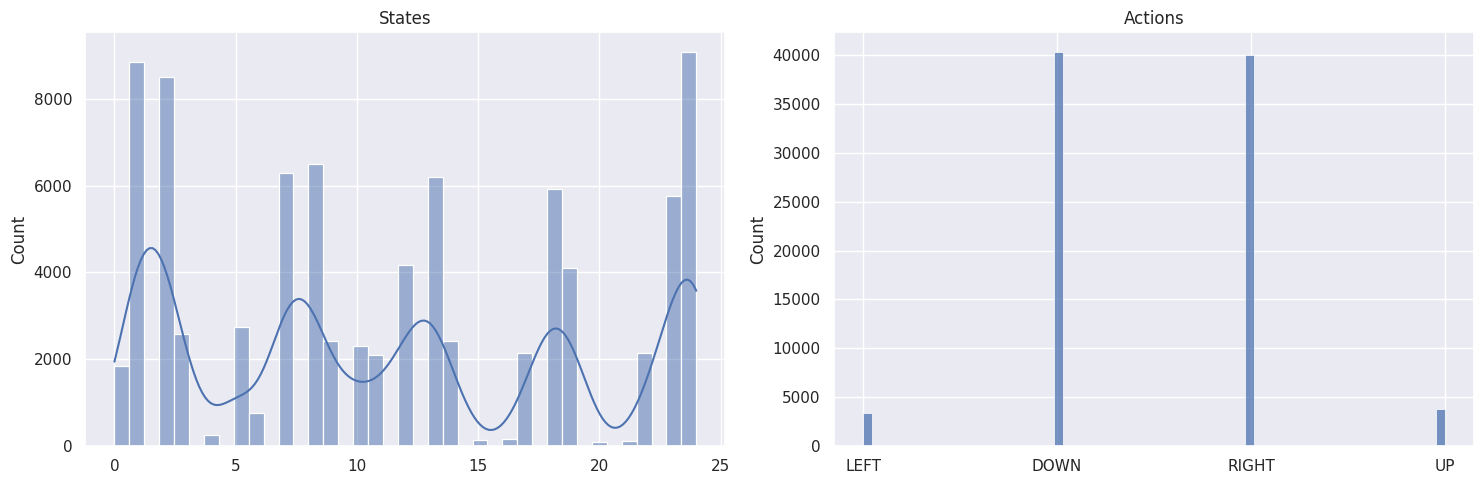

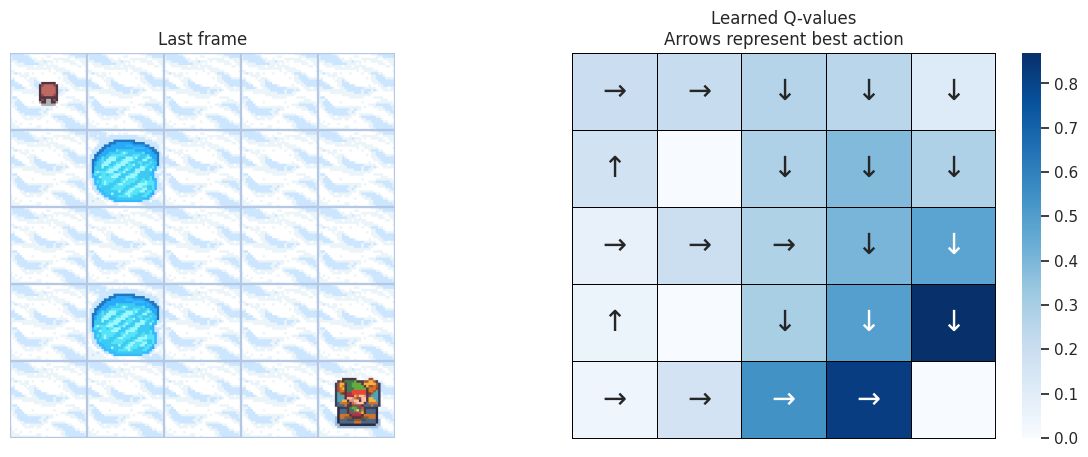

Running Q-Learning with α=0.1, γ=0.8, ε=0.2


Running Q-Learning with α=0.1, γ=0.8, ε=0.5


Running Q-Learning with α=0.1, γ=0.9, ε=0.1


Running Q-Learning with α=0.1, γ=0.9, ε=0.2


Running Q-Learning with α=0.1, γ=0.9, ε=0.5


Running Q-Learning with α=0.1, γ=0.95, ε=0.1


Running Q-Learning with α=0.1, γ=0.95, ε=0.2


Running Q-Learning with α=0.1, γ=0.95, ε=0.5


Running Q-Learning with α=0.5, γ=0.8, ε=0.1


Running Q-Learning with α=0.5, γ=0.8, ε=0.2


Running Q-Learning with α=0.5, γ=0.8, ε=0.5


Running Q-Learning with α=0.5, γ=0.9, ε=0.1


Running Q-Learning with α=0.5, γ=0.9, ε=0.2


Running Q-Learning with α=0.5, γ=0.9, ε=0.5


Running Q-Learning with α=0.5, γ=0.95, ε=0.1


Running Q-Learning with α=0.5, γ=0.95, ε=0.2


Running Q-Learning with α=0.5, γ=0.95, ε=0.5


Running Q-Learning with α=0.8, γ=0.8, ε=0.1


Running Q-Learning with α=0.8, γ=0.8, ε=0.2


Running Q-Learning with α=0.8, γ=0.8, ε=0.5


Running Q-Learning with α=0.8, γ=0.9, ε=0.1


Running Q-Learning with α=0.8, γ=0.9, ε=0.2


Running Q-Learning with α=0.8, γ=0.9, ε=0.5


Running Q-Learning with α=0.8, γ=0.95, ε=0.1


Running Q-Learning with α=0.8, γ=0.95, ε=0.2


Running Q-Learning with α=0.8, γ=0.95, ε=0.5



Q-Learning Performance for Various Hyperparameter Configurations:
      α     γ    ε Avg Success Rate Avg Steps Avg Reward (last 100 episodes)
0   0.1  0.80  0.1          100.00%       8.0                           0.94
1   0.1  0.80  0.2          100.00%       8.0                           0.91
2   0.1  0.80  0.5          100.00%       8.0                           0.59
3   0.1  0.90  0.1          100.00%       8.0                           0.95
4   0.1  0.90  0.2          100.00%       8.0                           0.88
5   0.1  0.90  0.5          100.00%       8.0                           0.70
6   0.1  0.95  0.1            0.00%     100.0                           0.93
7   0.1  0.95  0.2            0.00%     100.0                           0.91
8   0.1  0.95  0.5          100.00%       8.0                           0.71
9   0.5  0.80  0.1          100.00%       8.0                           0.96
10  0.5  0.80  0.2          100.00%       8.0                           0.90
11  0.5  

Q-Learning average reward last 100 episodes: 0.982


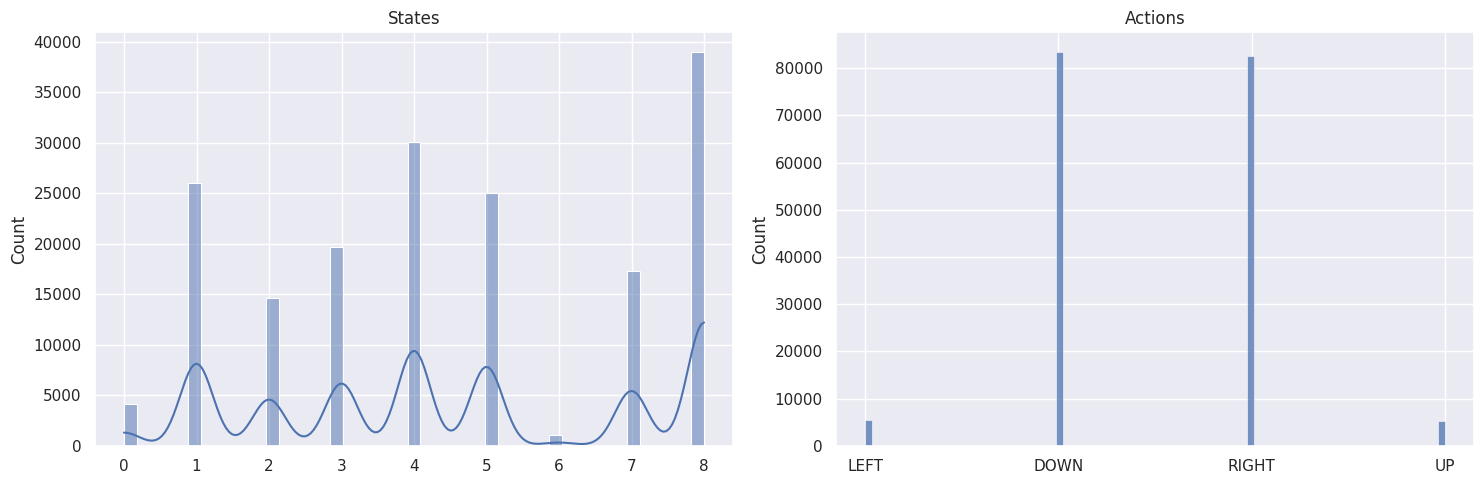

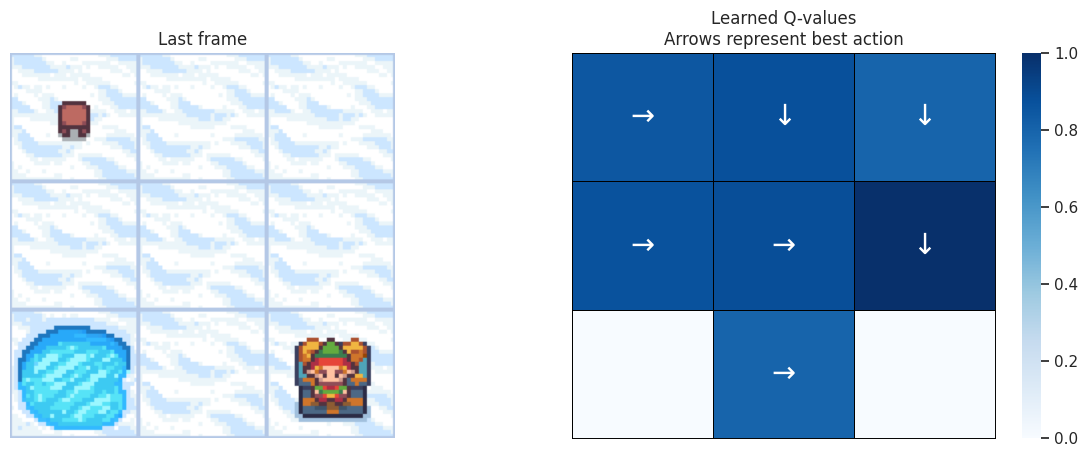

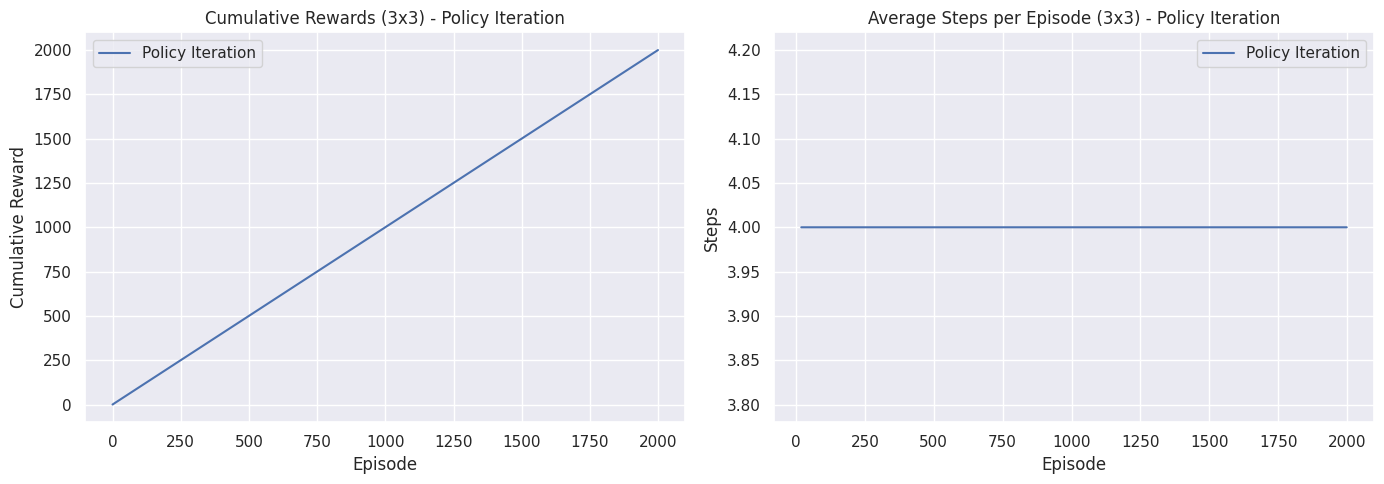

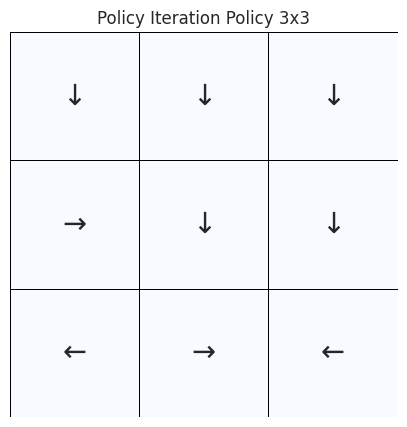

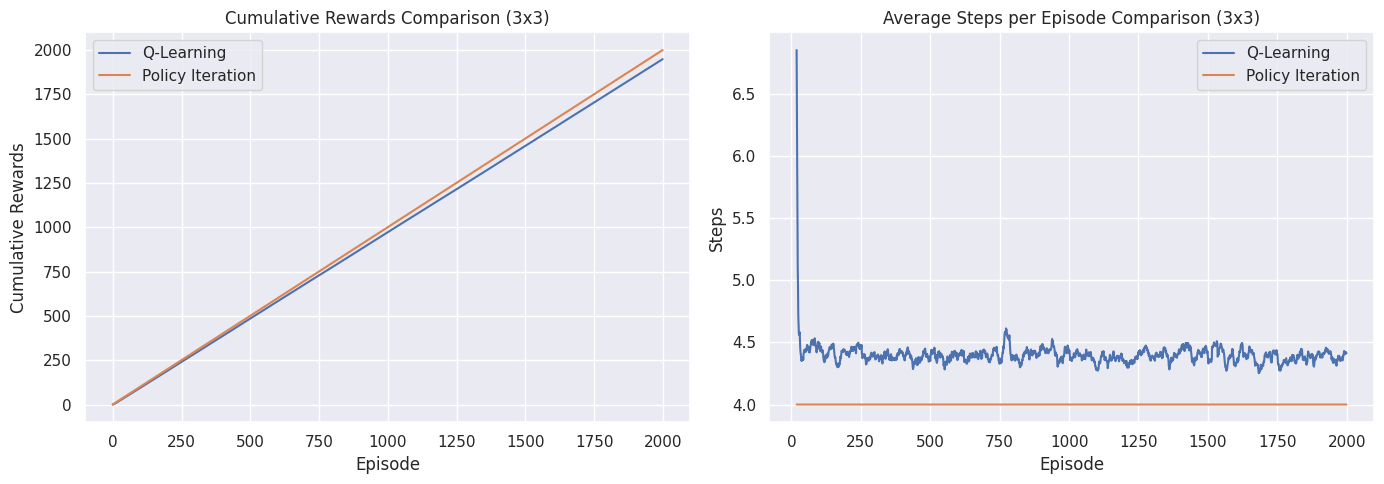


=== Running for map size: 5x5 ===


Q-Learning average reward last 100 episodes: 0.947


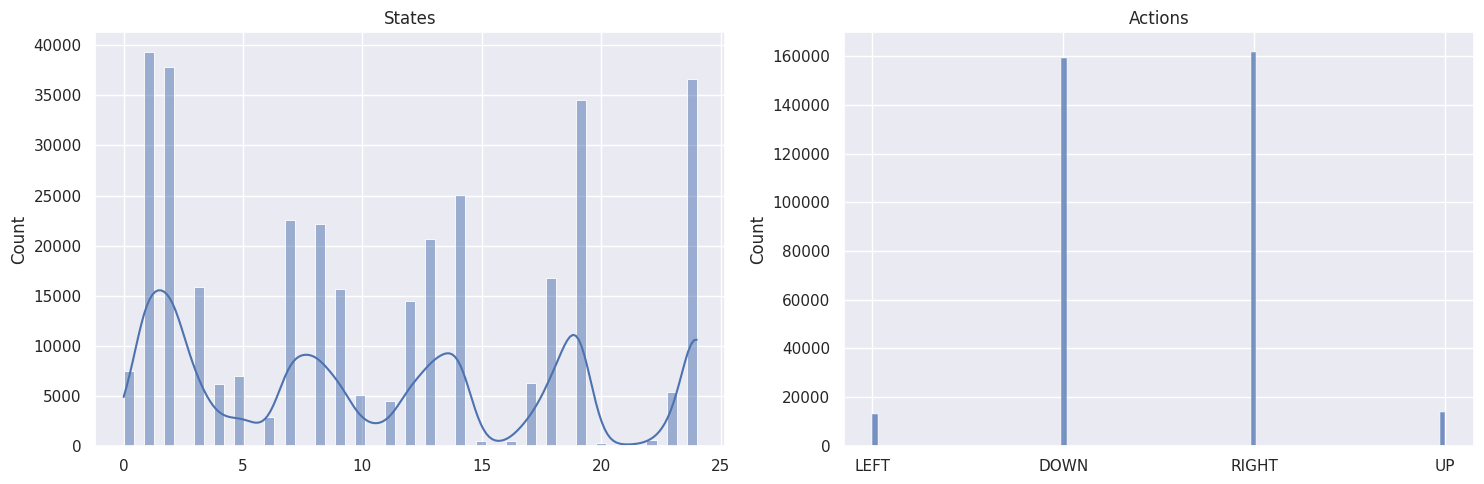

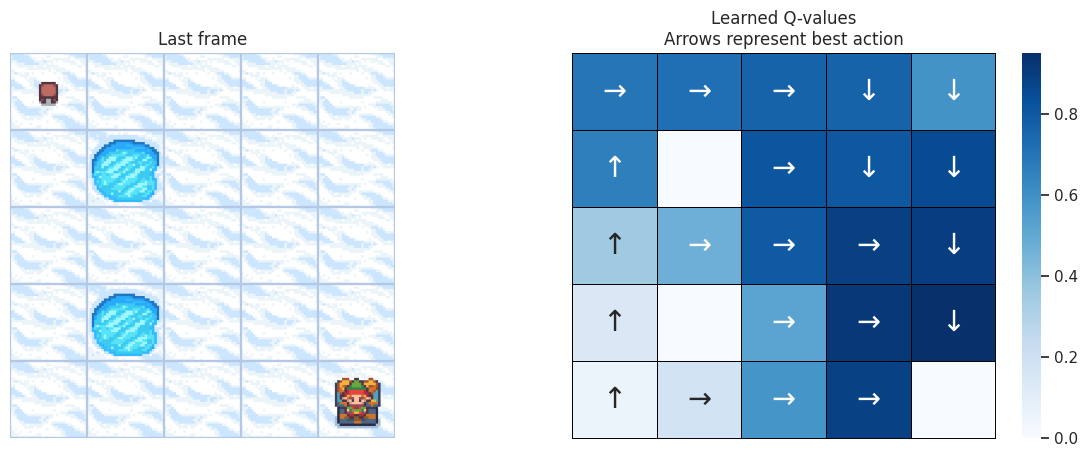

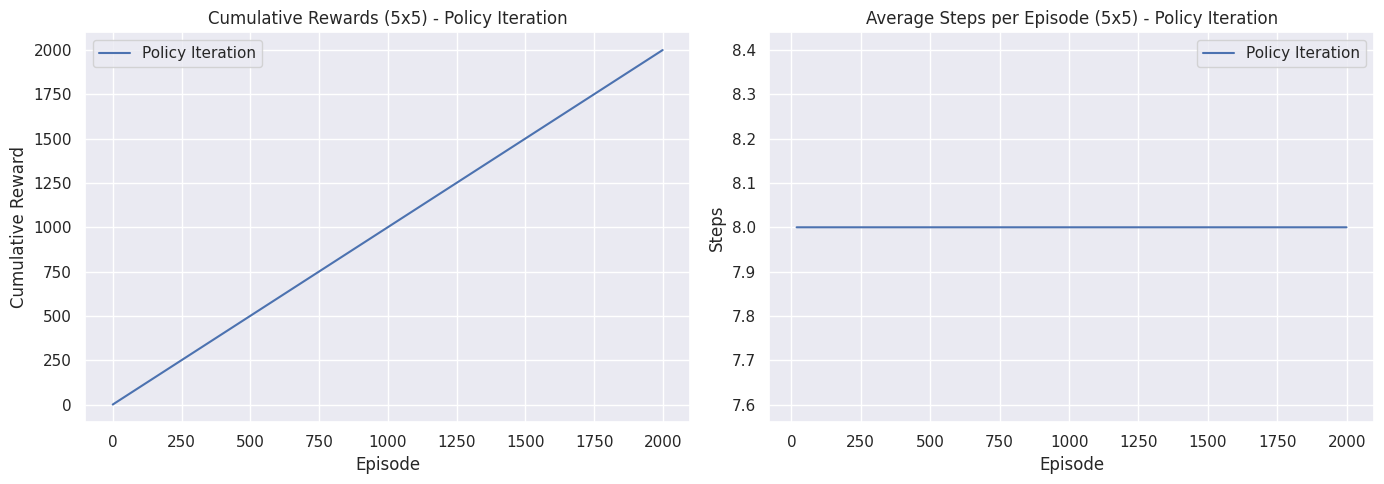

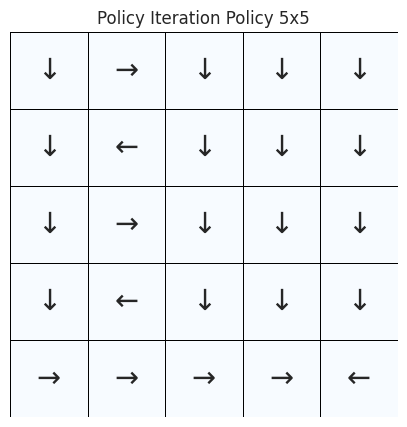

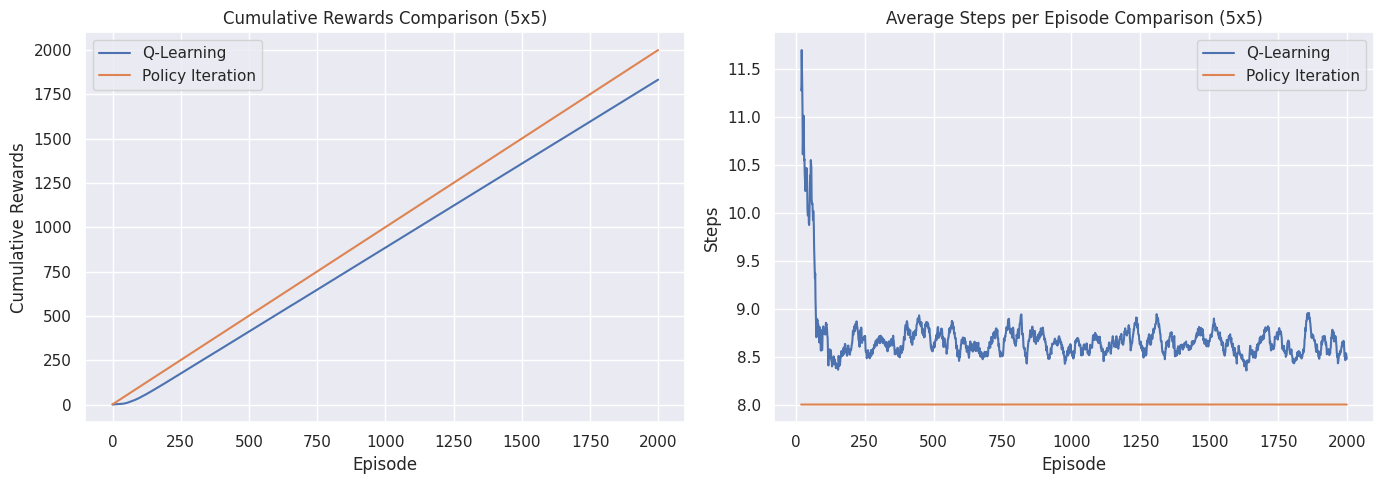


=== Running for map size: 7x7 ===


Q-Learning average reward last 100 episodes: 0.963


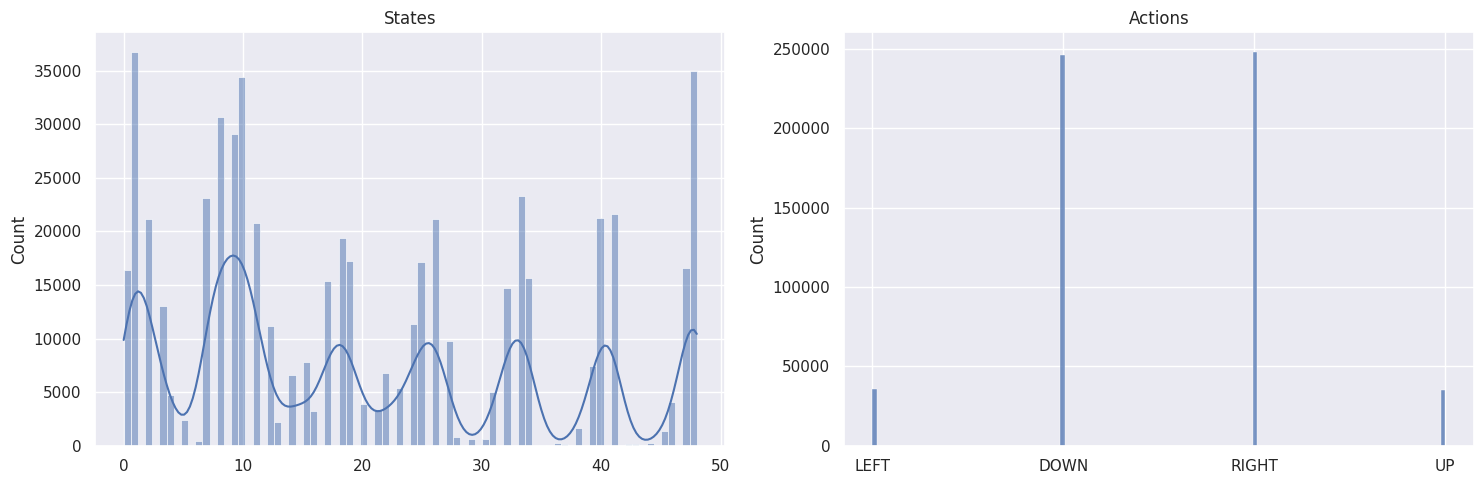

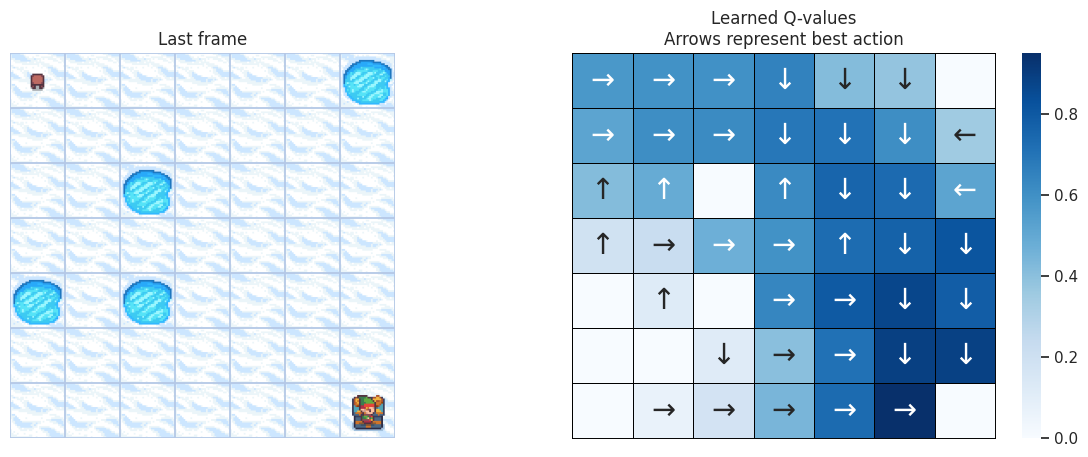

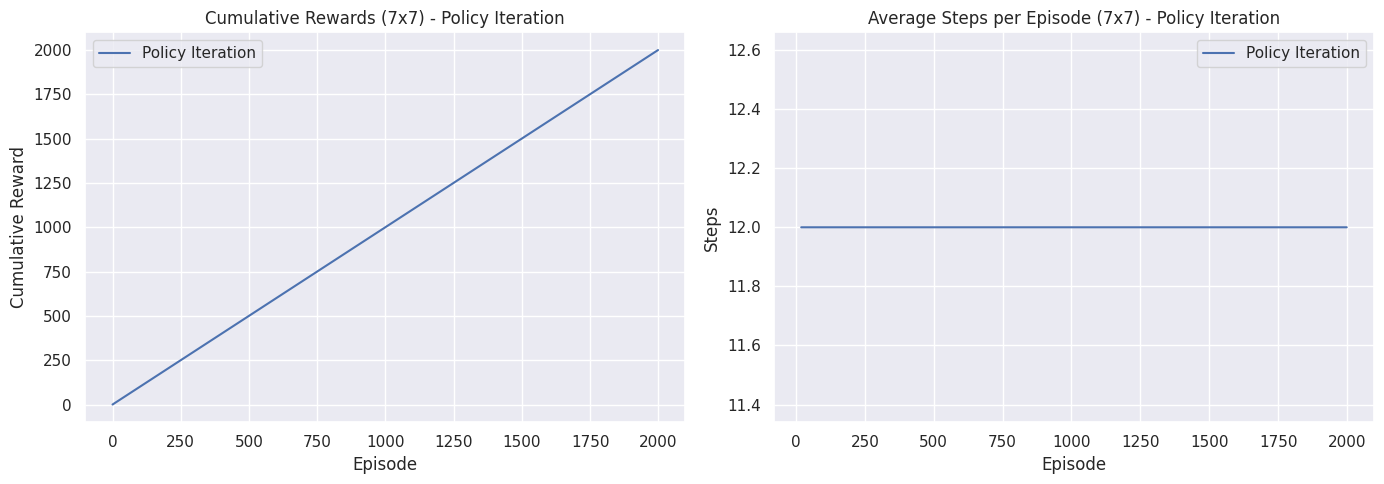

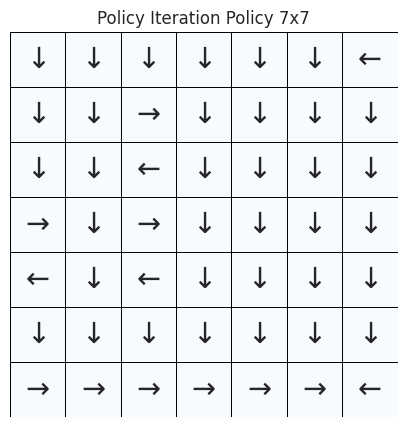

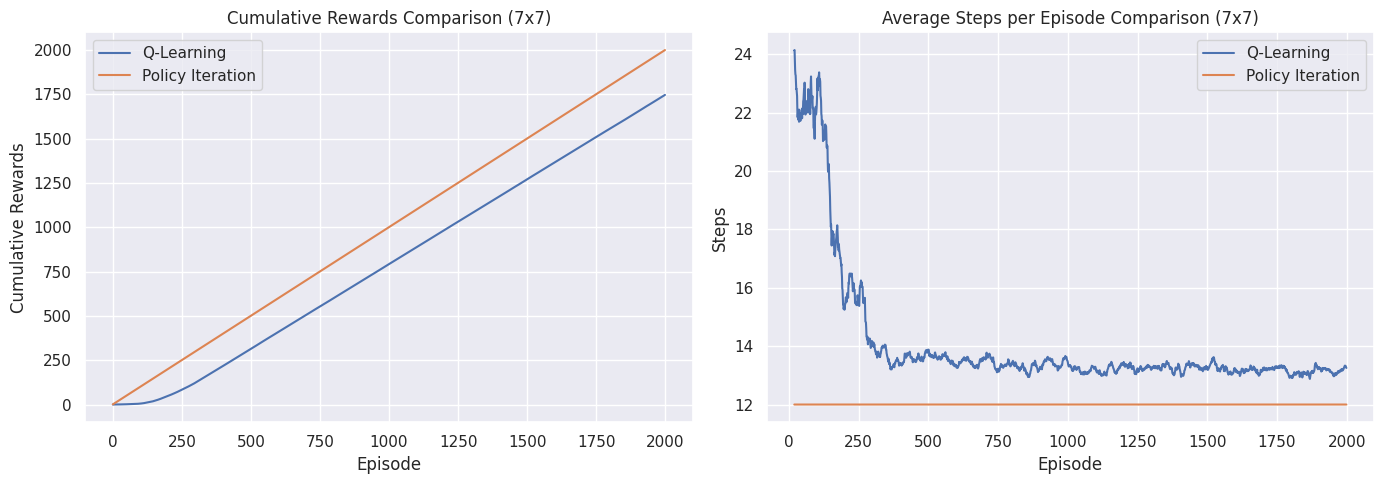


=== Running for map size: 9x9 ===


Q-Learning average reward last 100 episodes: 0.954


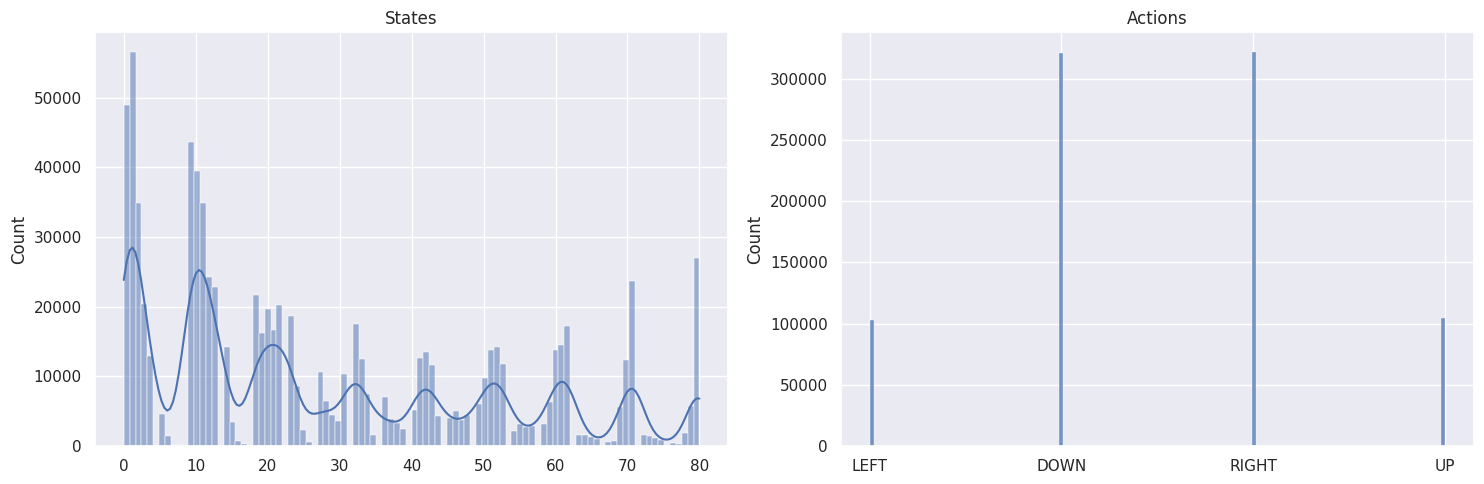

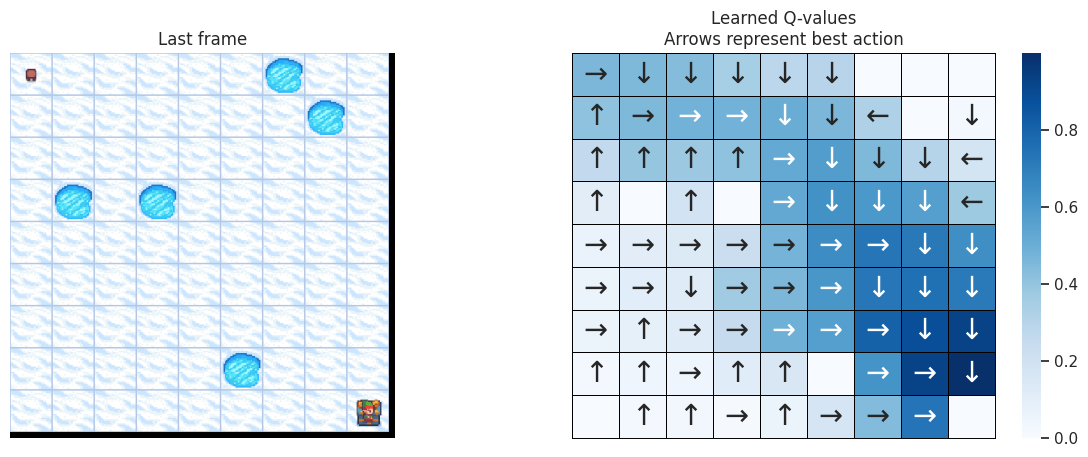

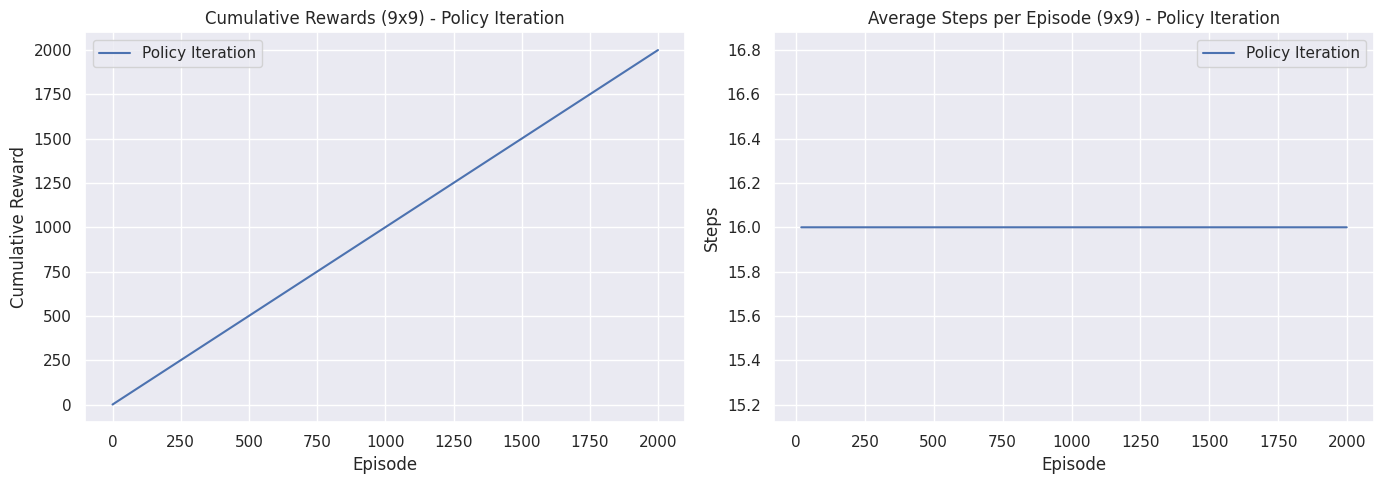

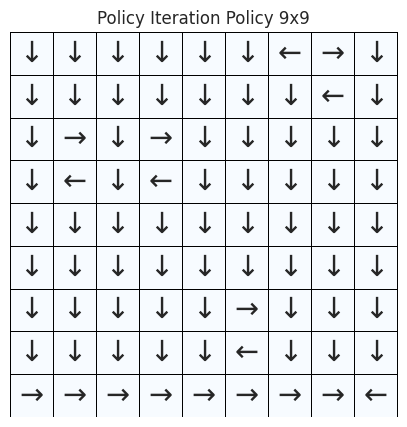

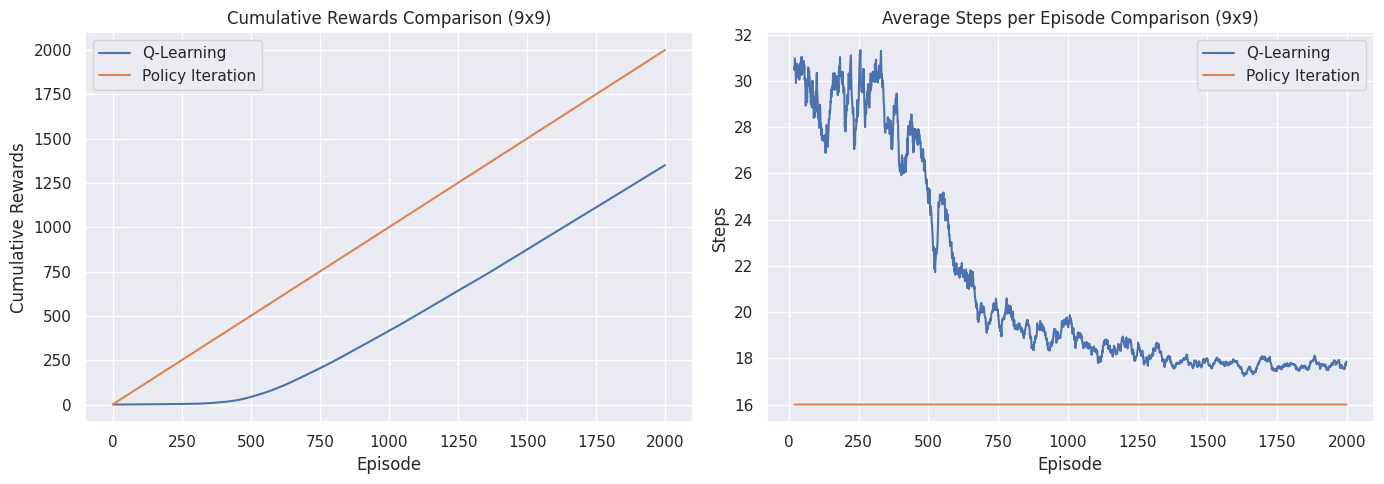


=== Running for map size: 11x11 ===


Q-Learning average reward last 100 episodes: 0.889


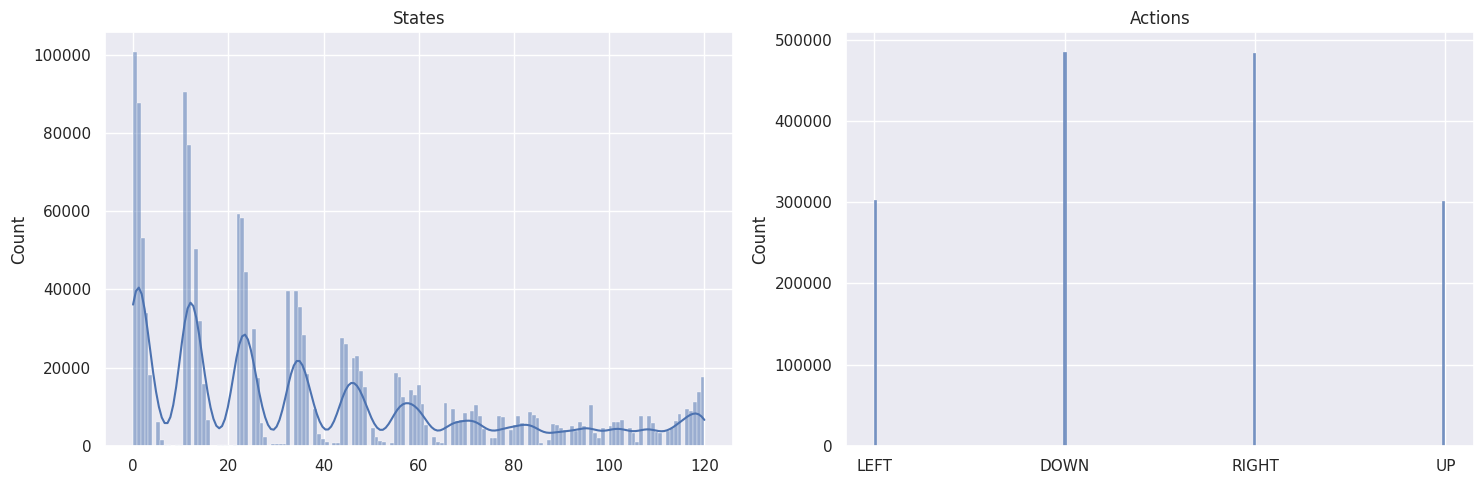

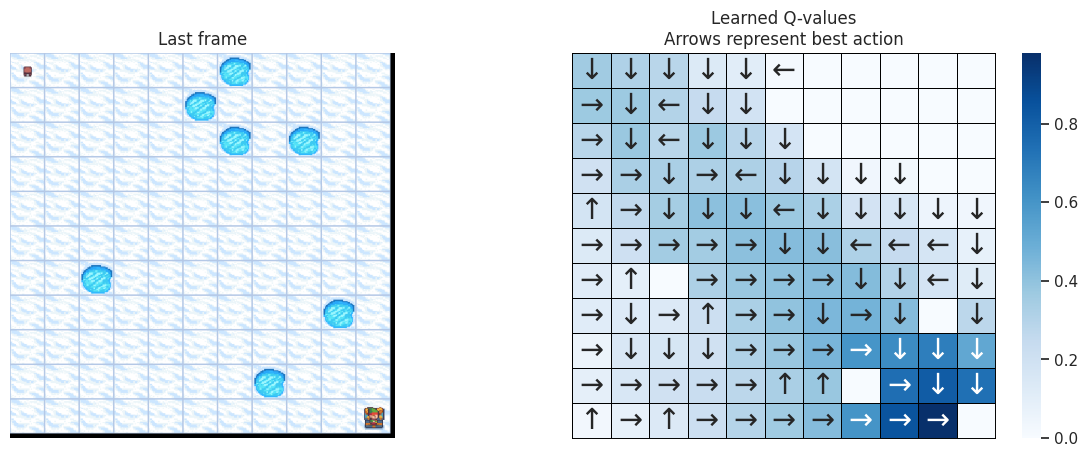

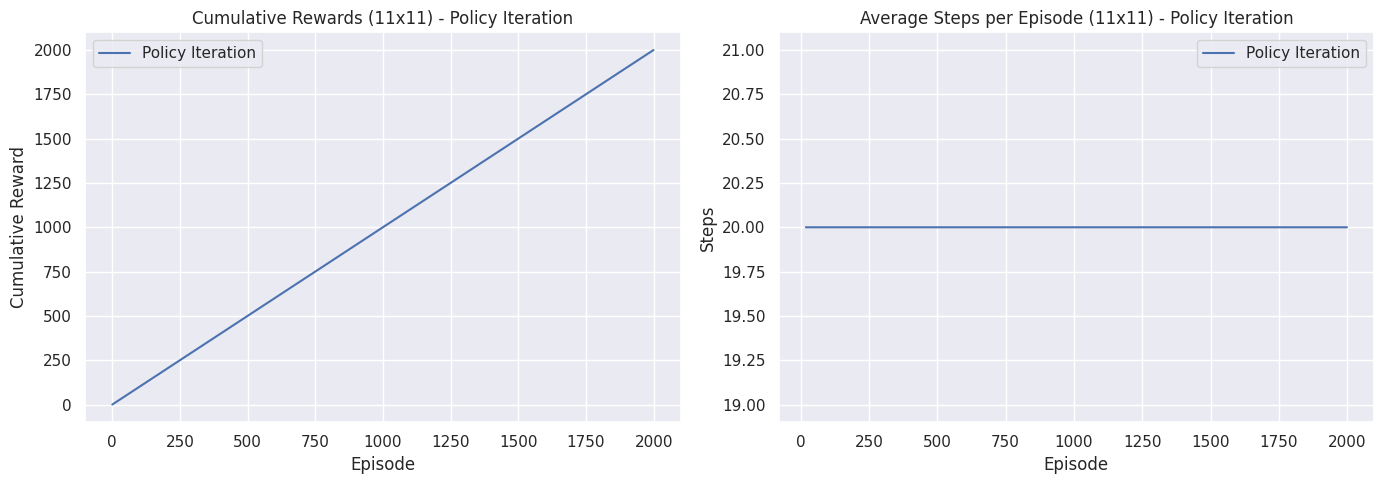

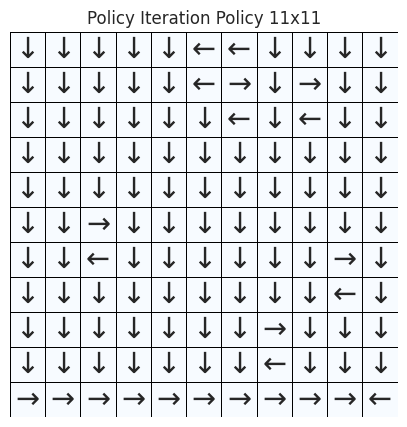

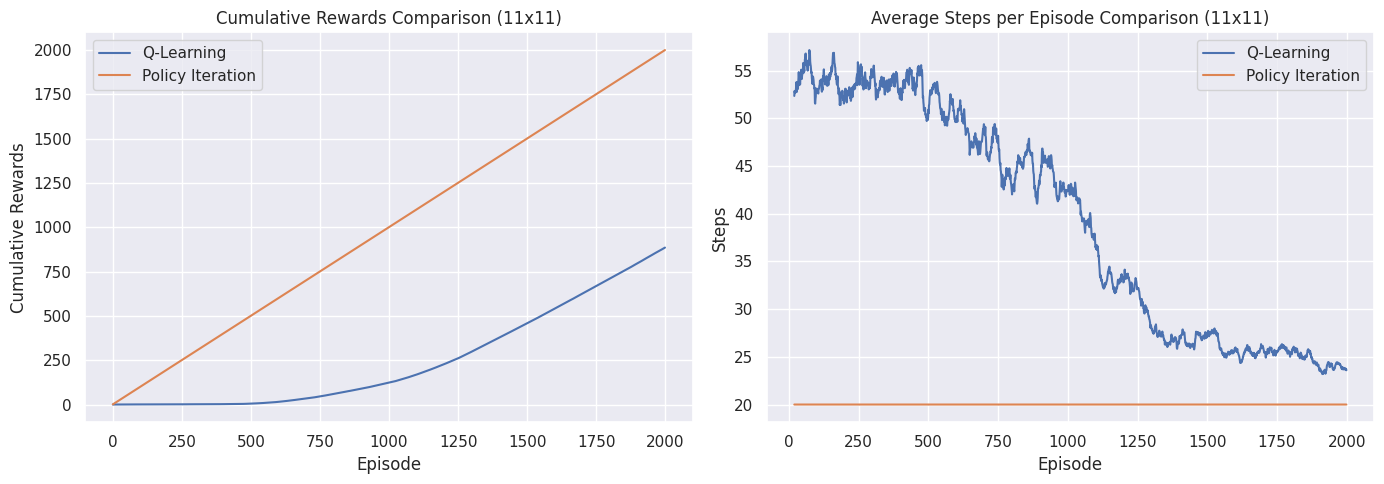

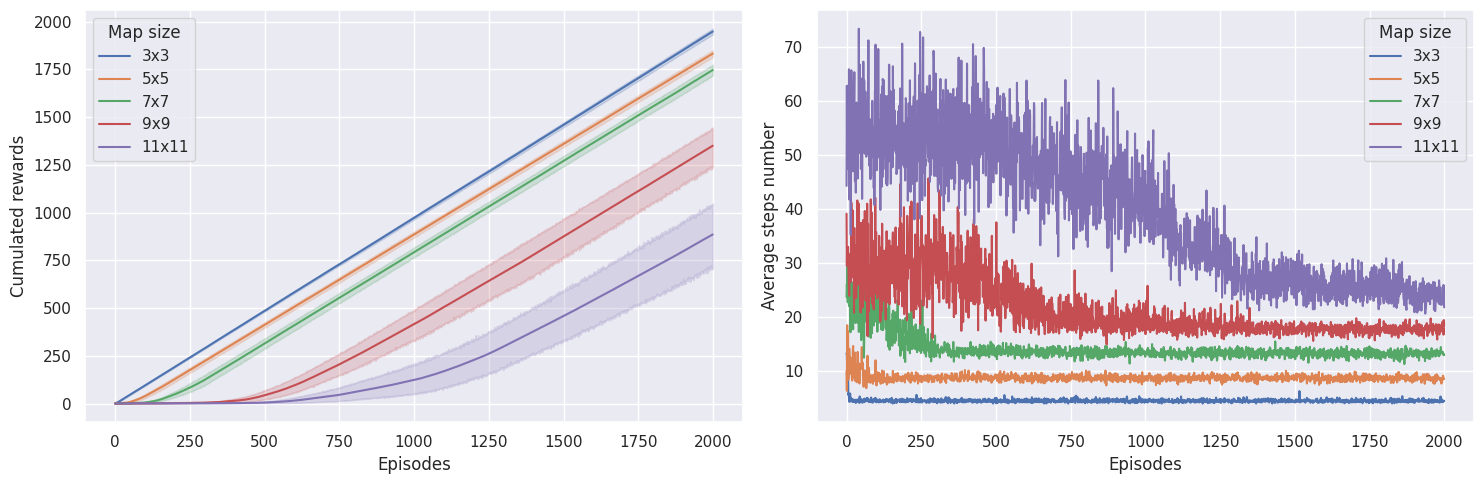

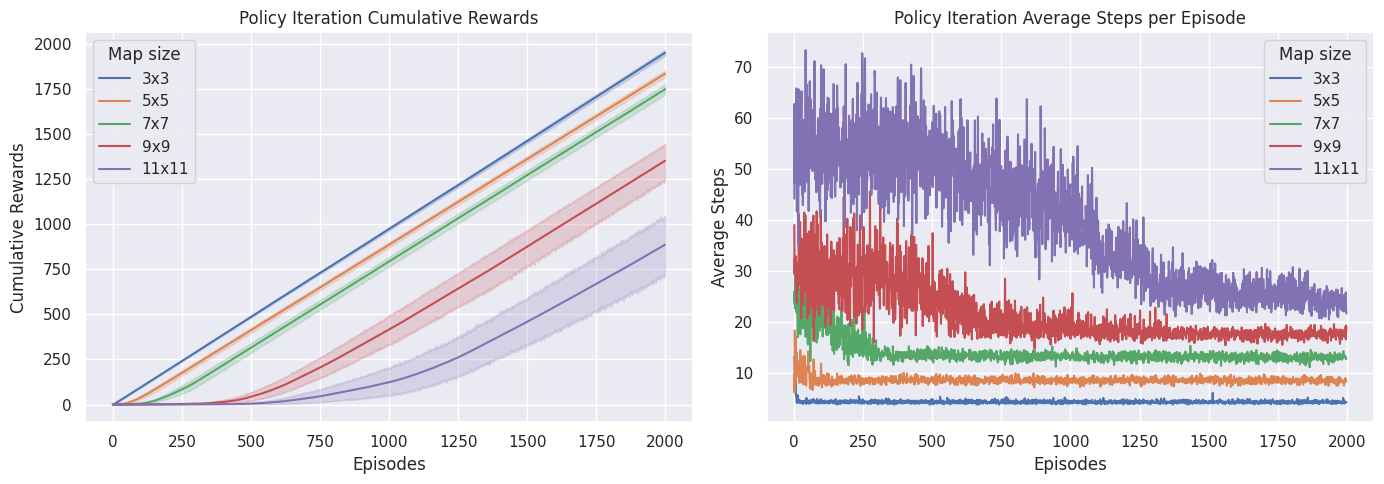

  Map Size Q-Learning Success Rate Q-Learning Avg Steps  \
0      3x3                   0.00%                  4.0   
1      5x5                   0.00%                  8.0   
2      7x7                   0.00%                100.0   
3      9x9                   0.00%                 16.0   
4    11x11                   0.00%                 20.0   

  Policy Iter Success Rate Policy Iter Avg Steps  PI Iterations to Converge  
0                    0.00%                   4.0                          3  
1                    0.00%                   8.0                          3  
2                    0.00%                  12.0                          4  
3                    0.00%                  16.0                          3  
4                    0.00%                  20.0                          3  


In [4]:
import itertools
from pathlib import Path
from typing import NamedTuple
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import gymnasium as gym
from gymnasium.envs.toy_text.frozen_lake import generate_random_map

sns.set_theme()

class Params(NamedTuple):
    total_episodes: int
    learning_rate: float
    gamma: float
    epsilon: float
    map_size: int
    seed: int
    is_slippery: bool
    n_runs: int
    action_size: int
    state_size: int
    proba_frozen: float
    savefig_folder: Path

params = Params(
    total_episodes=2000,
    learning_rate=0.8,
    gamma=0.95,
    epsilon=0.1,
    map_size=5,
    seed=123,
    is_slippery=False,
    n_runs=20,
    action_size=None,
    state_size=None,
    proba_frozen=0.9,
    savefig_folder=Path("./figures/"),
)

params.savefig_folder.mkdir(parents=True, exist_ok=True)

rng = np.random.default_rng(params.seed)

class Qlearning:
    def __init__(self, learning_rate, gamma, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.reset_qtable()

    def update(self, state, action, reward, new_state):
        delta = reward + self.gamma * np.max(self.qtable[new_state, :]) - self.qtable[state, action]
        self.qtable[state, action] += self.learning_rate * delta

    def reset_qtable(self):
        self.qtable = np.zeros((self.state_size, self.action_size))

class EpsilonGreedy:
    def __init__(self, epsilon):
        self.epsilon = epsilon

    def choose_action(self, action_space, state, qtable):
        if rng.uniform(0, 1) < self.epsilon:
            return action_space.sample()
        else:
            max_actions = np.flatnonzero(qtable[state] == qtable[state].max())
            return rng.choice(max_actions)

def run_env(env, params):
    learner = Qlearning(params.learning_rate, params.gamma, params.state_size, params.action_size)
    explorer = EpsilonGreedy(params.epsilon)

    rewards = np.zeros((params.total_episodes, params.n_runs))
    steps = np.zeros((params.total_episodes, params.n_runs))
    episodes = np.arange(params.total_episodes)
    qtables = np.zeros((params.n_runs, params.state_size, params.action_size))
    all_states = []
    all_actions = []

    for run in range(params.n_runs):
        learner.reset_qtable()
        for episode in tqdm(range(params.total_episodes), desc=f"Run {run+1}/{params.n_runs}", leave=False):
            state, _ = env.reset(seed=params.seed)
            done = False
            total_reward = 0
            step = 0

            while not done:
                action = explorer.choose_action(env.action_space, state, learner.qtable)
                new_state, reward, terminated, truncated, _ = env.step(action)
                done = terminated or truncated

                learner.update(state, action, reward, new_state)

                state = new_state
                total_reward += reward
                step += 1

                all_states.append(state)
                all_actions.append(action)

            rewards[episode, run] = total_reward
            steps[episode, run] = step
        qtables[run] = learner.qtable

    return rewards, steps, episodes, qtables, all_states, all_actions

def postprocess(episodes, params, rewards, steps, map_size):
    res = pd.DataFrame(
        {
            "Episodes": np.tile(episodes, reps=params.n_runs),
            "Rewards": rewards.flatten(order="F"),
            "Steps": steps.flatten(order="F"),
        }
    )
    res["cum_rewards"] = rewards.cumsum(axis=0).flatten(order="F")
    res["map_size"] = f"{map_size}x{map_size}"

    st = pd.DataFrame({"Episodes": episodes, "Steps": steps.mean(axis=1)})
    st["map_size"] = f"{map_size}x{map_size}"
    return res, st

def qtable_directions_map(qtable, map_size):
    qtable_val_max = qtable.max(axis=1).reshape(map_size, map_size)
    qtable_best_action = np.argmax(qtable, axis=1).reshape(map_size, map_size)
    directions = {0: "←", 1: "↓", 2: "→", 3: "↑"}
    qtable_directions = np.empty(qtable_best_action.flatten().shape, dtype=str)
    eps = np.finfo(float).eps
    for idx, val in enumerate(qtable_best_action.flatten()):
        if qtable_val_max.flatten()[idx] > eps:
            qtable_directions[idx] = directions[val]
        else:
            qtable_directions[idx] = ""
    qtable_directions = qtable_directions.reshape(map_size, map_size)
    return qtable_val_max, qtable_directions

def plot_q_values_map(qtable, env, map_size):
    qtable_val_max, qtable_directions = qtable_directions_map(qtable, map_size)

    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    ax[0].imshow(env.render())
    ax[0].axis("off")
    ax[0].set_title("Last frame")

    sns.heatmap(
        qtable_val_max,
        annot=qtable_directions,
        fmt="",
        ax=ax[1],
        cmap=sns.color_palette("Blues", as_cmap=True),
        linewidths=0.7,
        linecolor="black",
        xticklabels=False,
        yticklabels=False,
        annot_kws={"fontsize": "xx-large"},
    ).set(title="Learned Q-values\nArrows represent best action")

    for spine in ax[1].spines.values():
        spine.set_visible(True)
        spine.set_linewidth(0.7)
        spine.set_color("black")

    plt.show()

def plot_states_actions_distribution(states, actions, map_size):
    labels = {"LEFT": 0, "DOWN": 1, "RIGHT": 2, "UP": 3}

    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    sns.histplot(states, ax=ax[0], kde=True)
    ax[0].set_title("States")
    sns.histplot(actions, ax=ax[1])
    ax[1].set_xticks(list(labels.values()), labels=labels.keys())
    ax[1].set_title("Actions")
    plt.tight_layout()
    plt.show()

def plot_steps_and_rewards(rewards_df, steps_df):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    sns.lineplot(data=rewards_df, x="Episodes", y="cum_rewards", hue="map_size", ax=ax[0])
    ax[0].set(ylabel="Cumulated rewards")

    sns.lineplot(data=steps_df, x="Episodes", y="Steps", hue="map_size", ax=ax[1])
    ax[1].set(ylabel="Average steps number")

    for axi in ax:
        axi.legend(title="Map size")
    plt.tight_layout()
    plt.show()
def evaluate_policy(env, policy, n_episodes=100, max_steps=100):
    total_success = 0
    total_steps = []

    for _ in range(n_episodes):
        state, _ = env.reset()
        done = False
        steps = 0

        while not done and steps < max_steps:
            action = policy[state]
            state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            steps += 1

            if done and reward == 1.0:
                total_success += 1

        total_steps.append(steps)

    success_rate = total_success / n_episodes
    avg_steps = np.mean(total_steps)
    return success_rate, avg_steps


# Hyperparameter Experimentation
alpha_values = [0.1, 0.5, 0.8]
gamma_values = [0.8, 0.9, 0.95]
epsilon_values = [0.1, 0.2, 0.5]

hyperparam_results = []

# Run experiments for different hyperparameter configurations
for idx, (alpha, gamma, epsilon) in enumerate(itertools.product(alpha_values, gamma_values, epsilon_values)):
    print(f"Running Q-Learning with α={alpha}, γ={gamma}, ε={epsilon}")

    params = params._replace(learning_rate=alpha, gamma=gamma, epsilon=epsilon, n_runs=5)

    # Create environment
    env = gym.make(
        "FrozenLake-v1",
        is_slippery=params.is_slippery,
        render_mode="rgb_array",
        desc=generate_random_map(size=params.map_size, p=params.proba_frozen, seed=params.seed),
    )

    # Get state and action space sizes from the environment
    state_size = env.observation_space.n  # Number of states (FrozenLake size)
    action_size = env.action_space.n  # Number of actions (typically 4 for FrozenLake)

    # Update params with state_size and action_size
    params = params._replace(state_size=state_size, action_size=action_size)

    # Run Q-Learning
    rewards, steps, episodes, qtables, all_states, all_actions = run_env(env, params)
    res, st = postprocess(episodes, params, rewards, steps, map_size=params.map_size)

    q_cum_rewards = rewards.mean(axis=1)
    q_avg_steps = steps.mean(axis=1)
    q_policy = np.argmax(qtables.mean(axis=0), axis=1)
    q_success_rate, q_eval_avg_steps = evaluate_policy(env, q_policy, n_episodes=100)

    hyperparam_results.append({
        "α": alpha,
        "γ": gamma,
        "ε": epsilon,
        "Avg Success Rate": f"{q_success_rate:.2%}",
        "Avg Steps": f"{q_eval_avg_steps:.1f}",
        "Avg Reward (last 100 episodes)": f"{np.mean(q_cum_rewards[-100:]):.2f}"
    })

    # Plot only for the first hyperparameter configuration
    if idx == 0:
        plot_states_actions_distribution(all_states, all_actions, params.map_size)
        plot_q_values_map(qtables.mean(axis=0), env, params.map_size)

# Display Hyperparameter Performance Table
hyperparam_df = pd.DataFrame(hyperparam_results)
print("\nQ-Learning Performance for Various Hyperparameter Configurations:")
print(hyperparam_df)

# Optionally save the table to a CSV file
hyperparam_df.to_csv("qlearning_hyperparam_comparison.csv", index=False)

sns.set_theme()

class Params(NamedTuple):
    total_episodes: int
    learning_rate: float
    gamma: float
    epsilon: float
    map_size: int
    seed: int
    is_slippery: bool
    n_runs: int
    action_size: int
    state_size: int
    proba_frozen: float
    savefig_folder: Path

params = Params(
    total_episodes=2000,
    learning_rate=0.8,
    gamma=0.95,
    epsilon=0.1,
    map_size=5,
    seed=123,
    is_slippery=False,
    n_runs=20,
    action_size=None,
    state_size=None,
    proba_frozen=0.9,
    savefig_folder=Path("./figures/"),
)

# Create folder for figures
params.savefig_folder.mkdir(parents=True, exist_ok=True)

rng = np.random.default_rng(params.seed)

class Qlearning:
    def __init__(self, learning_rate, gamma, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.reset_qtable()

    def update(self, state, action, reward, new_state):
        delta = reward + self.gamma * np.max(self.qtable[new_state, :]) - self.qtable[state, action]
        self.qtable[state, action] += self.learning_rate * delta

    def reset_qtable(self):
        self.qtable = np.zeros((self.state_size, self.action_size))

class EpsilonGreedy:
    def __init__(self, epsilon):
        self.epsilon = epsilon

    def choose_action(self, action_space, state, qtable):
        if rng.uniform(0, 1) < self.epsilon:
            return action_space.sample()
        else:
            max_actions = np.flatnonzero(qtable[state] == qtable[state].max())
            return rng.choice(max_actions)

def run_env(env, params):
    learner = Qlearning(params.learning_rate, params.gamma, params.state_size, params.action_size)
    explorer = EpsilonGreedy(params.epsilon)

    rewards = np.zeros((params.total_episodes, params.n_runs))
    steps = np.zeros((params.total_episodes, params.n_runs))
    episodes = np.arange(params.total_episodes)
    qtables = np.zeros((params.n_runs, params.state_size, params.action_size))
    all_states = []
    all_actions = []

    for run in range(params.n_runs):
        learner.reset_qtable()
        for episode in tqdm(range(params.total_episodes), desc=f"Run {run+1}/{params.n_runs}", leave=False):
            state, _ = env.reset(seed=params.seed)
            done = False
            total_reward = 0
            step = 0

            while not done:
                action = explorer.choose_action(env.action_space, state, learner.qtable)
                new_state, reward, terminated, truncated, _ = env.step(action)
                done = terminated or truncated

                learner.update(state, action, reward, new_state)

                state = new_state
                total_reward += reward
                step += 1

                all_states.append(state)
                all_actions.append(action)

            rewards[episode, run] = total_reward
            steps[episode, run] = step
        qtables[run] = learner.qtable

    return rewards, steps, episodes, qtables, all_states, all_actions

def postprocess(episodes, params, rewards, steps, map_size):
    res = pd.DataFrame(
        {
            "Episodes": np.tile(episodes, reps=params.n_runs),
            "Rewards": rewards.flatten(order="F"),
            "Steps": steps.flatten(order="F"),
        }
    )
    res["cum_rewards"] = rewards.cumsum(axis=0).flatten(order="F")
    res["map_size"] = f"{map_size}x{map_size}"

    st = pd.DataFrame({"Episodes": episodes, "Steps": steps.mean(axis=1)})
    st["map_size"] = f"{map_size}x{map_size}"
    return res, st

def qtable_directions_map(qtable, map_size):
    qtable_val_max = qtable.max(axis=1).reshape(map_size, map_size)
    qtable_best_action = np.argmax(qtable, axis=1).reshape(map_size, map_size)
    directions = {0: "←", 1: "↓", 2: "→", 3: "↑"}
    qtable_directions = np.empty(qtable_best_action.flatten().shape, dtype=str)
    eps = np.finfo(float).eps
    for idx, val in enumerate(qtable_best_action.flatten()):
        if qtable_val_max.flatten()[idx] > eps:
            qtable_directions[idx] = directions[val]
        else:
            qtable_directions[idx] = ""
    qtable_directions = qtable_directions.reshape(map_size, map_size)
    return qtable_val_max, qtable_directions

def plot_q_values_map(qtable, env, map_size):
    qtable_val_max, qtable_directions = qtable_directions_map(qtable, map_size)

    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    ax[0].imshow(env.render())
    ax[0].axis("off")
    ax[0].set_title("Last frame")

    sns.heatmap(
        qtable_val_max,
        annot=qtable_directions,
        fmt="",
        ax=ax[1],
        cmap=sns.color_palette("Blues", as_cmap=True),
        linewidths=0.7,
        linecolor="black",
        xticklabels=False,
        yticklabels=False,
        annot_kws={"fontsize": "xx-large"},
    ).set(title="Learned Q-values\nArrows represent best action")

    for spine in ax[1].spines.values():
        spine.set_visible(True)
        spine.set_linewidth(0.7)
        spine.set_color("black")

    plt.show()

def plot_states_actions_distribution(states, actions, map_size):
    labels = {"LEFT": 0, "DOWN": 1, "RIGHT": 2, "UP": 3}

    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    sns.histplot(states, ax=ax[0], kde=True)
    ax[0].set_title("States")
    sns.histplot(actions, ax=ax[1])
    ax[1].set_xticks(list(labels.values()), labels=labels.keys())
    ax[1].set_title("Actions")
    plt.tight_layout()
    plt.show()

def plot_steps_and_rewards(rewards_df, steps_df):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    sns.lineplot(data=rewards_df, x="Episodes", y="cum_rewards", hue="map_size", ax=ax[0])
    ax[0].set(ylabel="Cumulated rewards")

    sns.lineplot(data=steps_df, x="Episodes", y="Steps", hue="map_size", ax=ax[1])
    ax[1].set(ylabel="Average steps number")

    for axi in ax:
        axi.legend(title="Map size")
    plt.tight_layout()
    plt.show()

def policy_evaluation(env, policy, gamma=0.95, theta=1e-6):
    V = np.zeros(env.observation_space.n)
    while True:
        delta = 0
        for s in range(env.observation_space.n):
            v = 0
            for a, action_prob in enumerate(policy[s]):
                for prob, next_state, reward, done in env.unwrapped.P[s][a]:
                    v += action_prob * prob * (reward + gamma * V[next_state])
            delta = max(delta, abs(v - V[s]))
            V[s] = v
        if delta < theta:
            break
    return V

def policy_improvement(env, V, gamma=0.95):
    policy = np.zeros((env.observation_space.n, env.action_space.n))
    for s in range(env.observation_space.n):
        Q = np.zeros(env.action_space.n)
        for a in range(env.action_space.n):
            for prob, next_state, reward, done in env.unwrapped.P[s][a]:
                Q[a] += prob * (reward + gamma * V[next_state])
        best_action = np.argmax(Q)
        policy[s] = np.eye(env.action_space.n)[best_action]
    return policy

def policy_iteration(env, gamma=0.95, theta=1e-6):
    policy = np.ones((env.observation_space.n, env.action_space.n)) / env.action_space.n
    iterations = 0
    while True:
        iterations += 1
        V = policy_evaluation(env, policy, gamma, theta)
        new_policy = policy_improvement(env, V, gamma)
        if np.array_equal(new_policy, policy):
            break
        policy = new_policy
    return policy, V, iterations

def extract_policy(policy):
    return np.array([np.argmax(action_prob) for action_prob in policy])

def evaluate_policy(env, policy, n_episodes=100):
    success_count = 0
    total_steps = 0
    for _ in range(n_episodes):
        state, _ = env.reset()
        done = False
        step = 0
        while not done:
            action = policy[state]
            state, _, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            step += 1
        total_steps += step
        success_count += 1 if not done else 0

    success_rate = success_count / n_episodes
    avg_steps = total_steps / n_episodes
    return success_rate, avg_steps

def run_policy_iteration_episodes(env, policy, n_episodes=100):
    rewards = np.zeros(n_episodes)
    steps = np.zeros(n_episodes)
    for i in range(n_episodes):
        state, _ = env.reset()
        done = False
        total_reward = 0
        step = 0
        while not done:
            action = policy[state]
            state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            total_reward += reward
            step += 1
        rewards[i] = total_reward
        steps[i] = step
    return rewards, steps
def plot_policy(policy, env, map_size, title=None):
    directions = {0: "←", 1: "↓", 2: "→", 3: "↑"}
    policy_arrows = np.array([directions[a] for a in policy]).reshape((map_size, map_size))

    fig, ax = plt.subplots(figsize=(5, 5))
    sns.heatmap(
        np.zeros((map_size, map_size)),
        annot=policy_arrows,
        fmt="",
        cbar=False,
        cmap="Blues",
        linewidths=0.5,
        linecolor="black",
        xticklabels=False,
        yticklabels=False,
        annot_kws={"fontsize": "xx-large"},
        ax=ax
    )
    if title:
        ax.set_title(title)
    plt.show()
def plot_cum_rewards_and_steps(q_cum_rewards, q_avg_steps, pi_cum_rewards, pi_avg_steps, map_size):
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))

    # Plot Cumulative Rewards
    ax[0].plot(np.cumsum(q_cum_rewards), label="Q-Learning")
    ax[0].plot(np.cumsum(pi_cum_rewards), label="Policy Iteration")
    ax[0].set_title(f"Cumulative Rewards Comparison ({map_size}x{map_size})")
    ax[0].set_xlabel("Episode")
    ax[0].set_ylabel("Cumulative Rewards")
    ax[0].legend()

    # Plot Average Steps per Episode (rolling mean for smoothing)
    ax[1].plot(pd.Series(q_avg_steps).rolling(20).mean(), label="Q-Learning")
    ax[1].plot(pd.Series(pi_avg_steps).rolling(20).mean(), label="Policy Iteration")
    ax[1].set_title(f"Average Steps per Episode Comparison ({map_size}x{map_size})")
    ax[1].set_xlabel("Episode")
    ax[1].set_ylabel("Steps")
    ax[1].legend()

    plt.tight_layout()
    plt.show()



def plot_policy_iteration_cum_rewards_and_steps(res_all, st_all, map_sizes):
    # Prepare DataFrame for plotting Policy Iteration's Cumulative Rewards and Steps
    pi_res_all = pd.DataFrame()
    pi_st_all = pd.DataFrame()

    # Loop over each map size and collect the necessary data for Policy Iteration
    for map_size in map_sizes:
        pi_res = res_all[res_all["map_size"] == f"{map_size}x{map_size}"]
        pi_st = st_all[st_all["map_size"] == f"{map_size}x{map_size}"]

        # Add Policy Iteration cumulative rewards and steps for each map size
        pi_res_all = pd.concat([pi_res_all, pi_res])
        pi_st_all = pd.concat([pi_st_all, pi_st])

    # Create the plots for cumulative rewards and average steps for Policy Iteration
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))

    # Cumulative Rewards Plot for Policy Iteration
    sns.lineplot(data=pi_res_all, x="Episodes", y="cum_rewards", hue="map_size", ax=ax[0])
    ax[0].set_title("Policy Iteration Cumulative Rewards")
    ax[0].set_xlabel("Episodes")
    ax[0].set_ylabel("Cumulative Rewards")
    ax[0].legend(title="Map size")

    # Average Steps Plot for Policy Iteration
    sns.lineplot(data=pi_st_all, x="Episodes", y="Steps", hue="map_size", ax=ax[1])
    ax[1].set_title("Policy Iteration Average Steps per Episode")
    ax[1].set_xlabel("Episodes")
    ax[1].set_ylabel("Average Steps")
    ax[1].legend(title="Map size")

    plt.tight_layout()
    plt.show()

def print_comparison_table(comparison_results):
    df = pd.DataFrame(comparison_results)
    print(df)

# --- Main experiment loop ---
map_sizes = [3, 5, 7, 9, 11]

res_all = pd.DataFrame()
st_all = pd.DataFrame()

comparison_results = []

for map_size in map_sizes:
    print(f"\n=== Running for map size: {map_size}x{map_size} ===")
    env = gym.make(
        "FrozenLake-v1",
        is_slippery=params.is_slippery,
        render_mode="rgb_array",
        desc=generate_random_map(size=map_size, p=params.proba_frozen, seed=params.seed),
    )
    params = params._replace(action_size=env.action_space.n, state_size=env.observation_space.n, map_size=map_size)
    env.action_space.seed(params.seed)

    # Q-Learning
    rewards, steps, episodes, qtables, all_states, all_actions = run_env(env, params)
    res, st = postprocess(episodes, params, rewards, steps, map_size)
    res_all = pd.concat([res_all, res])
    st_all = pd.concat([st_all, st])
    qtable_mean = qtables.mean(axis=0)

    print(f"Q-Learning average reward last 100 episodes: {np.mean(rewards[-100:]):.3f}")
    plot_states_actions_distribution(all_states, all_actions, map_size)
    plot_q_values_map(qtable_mean, env, map_size)

    q_policy = np.argmax(qtable_mean, axis=1)
    q_success_rate, q_eval_avg_steps = evaluate_policy(env, q_policy, n_episodes=100)
    q_cum_rewards = rewards.mean(axis=1)
    q_avg_steps = steps.mean(axis=1)

    # Policy Iteration
    pi_policy_soft, _, pi_iterations = policy_iteration(env, gamma=params.gamma)
    pi_policy = extract_policy(pi_policy_soft)
    pi_success_rate, pi_eval_avg_steps = evaluate_policy(env, pi_policy, n_episodes=100)
    pi_rewards, pi_steps = run_policy_iteration_episodes(env, pi_policy, n_episodes=params.total_episodes)
    pi_cum_rewards = pi_rewards
    pi_avg_steps_series = pi_steps

    # Plot Policy Iteration Cumulative Rewards and Average Steps
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))

    # Plot Cumulative Rewards for Policy Iteration
    ax[0].plot(np.cumsum(pi_cum_rewards), label="Policy Iteration")
    ax[0].set_title(f"Cumulative Rewards ({map_size}x{map_size}) - Policy Iteration")
    ax[0].set_xlabel("Episode")
    ax[0].set_ylabel("Cumulative Reward")
    ax[0].legend()

    # Plot Average Steps per Episode for Policy Iteration
    ax[1].plot(pd.Series(pi_avg_steps_series).rolling(20).mean(), label="Policy Iteration")
    ax[1].set_title(f"Average Steps per Episode ({map_size}x{map_size}) - Policy Iteration")
    ax[1].set_xlabel("Episode")
    ax[1].set_ylabel("Steps")
    ax[1].legend()

    plt.tight_layout()
    plt.show()

    # Plot Policy Iteration Policy
    plot_policy(pi_policy, env, map_size, title=f"Policy Iteration Policy {map_size}x{map_size}")
    plot_cum_rewards_and_steps(q_cum_rewards, q_avg_steps, pi_cum_rewards, pi_avg_steps_series, map_size)

    # Store results for table
    comparison_results.append({
        "Map Size": f"{map_size}x{map_size}",
        "Q-Learning Success Rate": f"{q_success_rate:.2%}",
        "Q-Learning Avg Steps": f"{q_eval_avg_steps:.1f}",
        "Policy Iter Success Rate": f"{pi_success_rate:.2%}",
        "Policy Iter Avg Steps": f"{pi_eval_avg_steps:.1f}",
        "PI Iterations to Converge": pi_iterations
    })

    env.close()

# Plot aggregated Q-learning results
plot_steps_and_rewards(res_all, st_all)

# Plot Policy Iteration Cumulative Rewards and Steps for all map sizes
plot_policy_iteration_cum_rewards_and_steps(res_all, st_all, map_sizes)

# Print comparison table of results
print_comparison_table(comparison_results)


